In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/usps-dataset/usps.h5


In [2]:
# importing libraries

import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_curve,auc
import h5py

**Loading Data**

Reading USPS data stored in HDF5 file, then loading the training and test data into the variables x_train and x_test, respectively, and their corresponding labels into y_train and y_test

In [3]:
# reading the data from the HDF5 file and loading it to x_train, y_train, x_test, y_test variables
with h5py.File('/kaggle/input/usps-dataset/usps.h5', 'r') as f:
    print(list(f.keys()))
    x_train = f['/train/data'][:]
    y_train = f['/train/target'][:]
    x_test = f['/test/data'][:]
    y_test = f['/test/target'][:]

['test', 'train']


In [4]:
# no. of records in training and testing data
print('No. of records in Train Dataset: ',len(x_train))
print('No. of records in Test Dataset: ',len(x_test))

No. of records in Train Dataset:  7291
No. of records in Test Dataset:  2007


In [5]:
#unique labels present in training data
print('Labels of training data: ', set(y_train))

Labels of training data:  {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


In [6]:
# reshaping training and testing data to 1D array and then normalizing the pixel values between 0 and 1
x_train = x_train.reshape(x_train.shape[0], -1) / 255.0
x_test = x_test.reshape(x_test.shape[0], -1) / 255.0

**Calculate Optimal Value of K for Euclidean distance metric**

In KNN, it is generally recommended to start with a value of k=3 or greater. This is because if k is too small, the model may be overly sensitive to noise and outliers in the data, leading to overfitting.

In [7]:
# using cross validation score to calculate optimal value of K

klist = []
K_scores = []
for k in range(3,21):
   klist.append(k)
   knn = KNeighborsClassifier(n_neighbors = k, metric= 'euclidean')
   scores = cross_val_score(knn,x_train,y_train,cv=10, scoring = 'accuracy')
   K_scores.append(scores.mean())

In [8]:
print(K_scores)

[0.9666709885938705, 0.9639278801886615, 0.9640659939493019, 0.9609109870905913, 0.9613219459947009, 0.9603611627863277, 0.959401507037225, 0.9585784617697353, 0.9574810680797491, 0.9546009733731703, 0.9543262491309168, 0.9532290433508089, 0.9504859349456002, 0.9493885412556139, 0.9473313039066464, 0.9462346618561739, 0.9448631076535694, 0.9440402502959582]


In [9]:
#calculating Mean Squared Error (MSE)
MSE=[1-x for x in K_scores]

Text(0, 0.5, 'Mean Error')

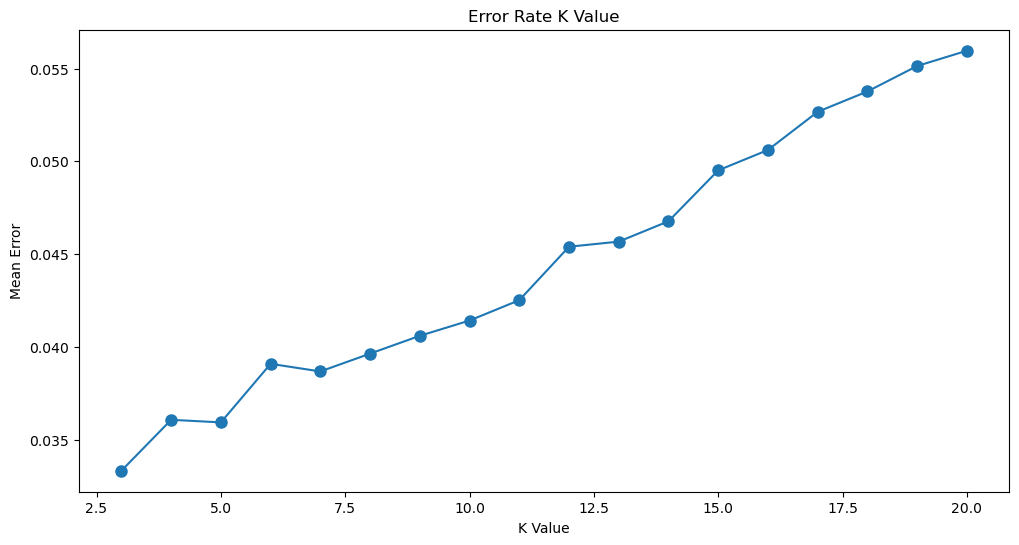

In [10]:
#plotting graph to visualize error rate and k values
plt.figure(figsize=(12, 6))
plt.plot(range(3,21), MSE, linestyle="solid", marker='o',markersize=8)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [11]:
#value of k for which mse is minimum is optimal
Optimal_K = klist[MSE.index(min(MSE))]

print("The optimal value of K (neighbors) is ",Optimal_K)

The optimal value of K (neighbors) is  3


**Training Model on Optimal Value of K**

In [12]:
knn = KNeighborsClassifier(metric="euclidean", n_neighbors=3)
knn.fit(x_train, y_train)


KNeighborsClassifier(metric='euclidean', n_neighbors=3)

**Model Evaluation**

In [13]:
#predicting test data
y_predict= knn.predict(x_test)


In [14]:
#calculating accuracy of trained model

accuracy=accuracy_score(y_test,y_predict)
print(f'Accuracy Score of the Model: {accuracy}')

Accuracy Score of the Model: 0.9446935724962631


**Confusion Matrix**

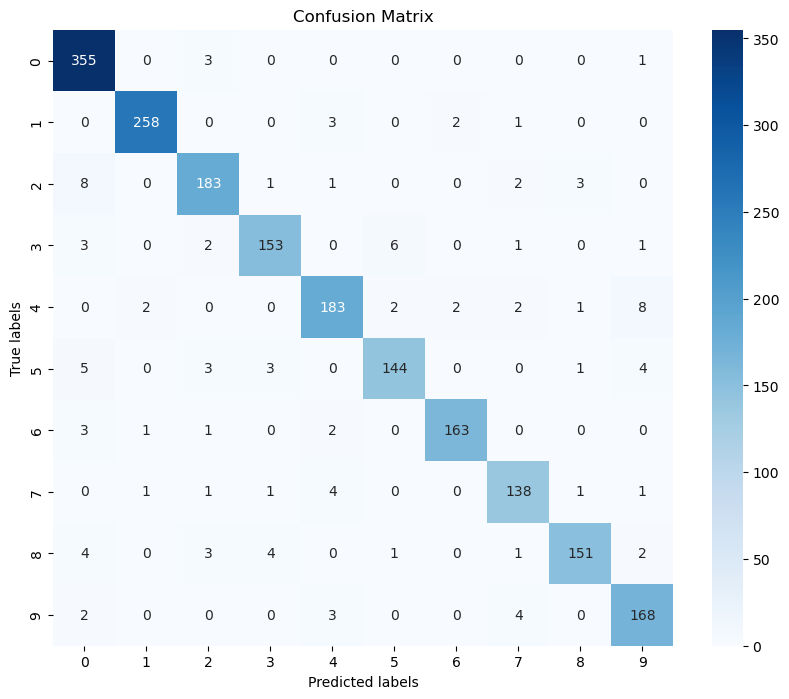

In [15]:
# confusion matrix
cm = confusion_matrix(y_test, y_predict)

fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=np.arange(0, 10), yticklabels=np.arange(0, 10))
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
plt.show()

**Classification Report**

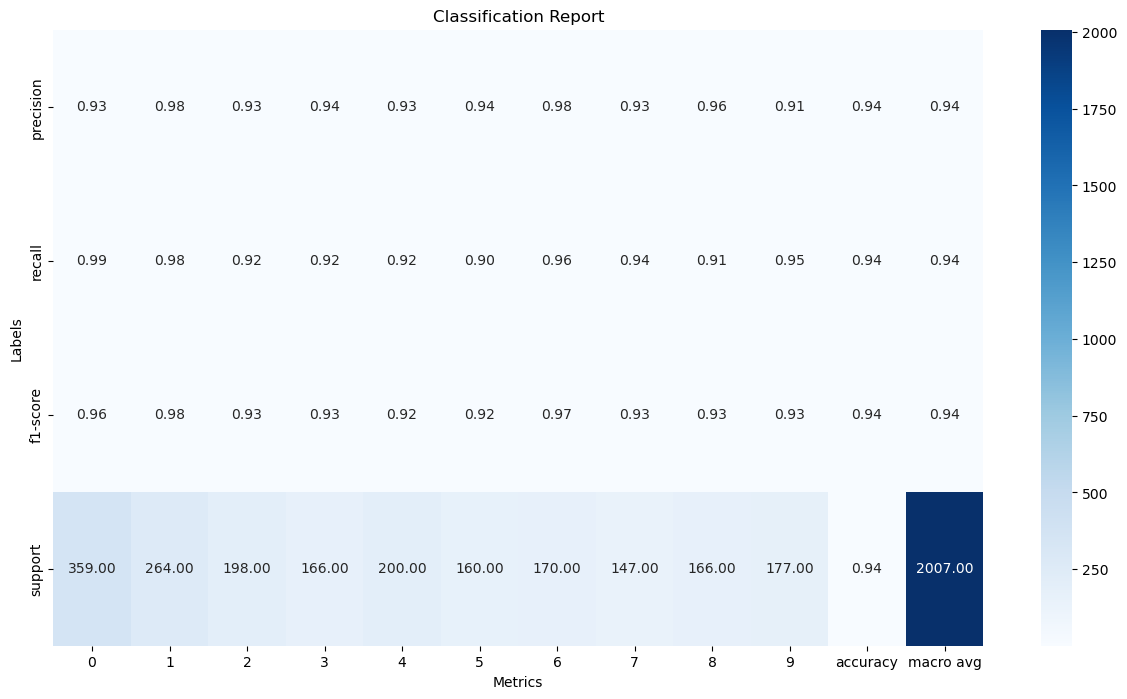

In [16]:
# classification Report
report = classification_report(y_test, y_predict, output_dict=True)
df = pd.DataFrame(report).transpose()

fig, ax = plt.subplots(figsize=(15, 8))
ax = sns.heatmap(df.iloc[:-1, :].T, annot=True, cmap='Blues', fmt='.2f')
ax.set_xlabel('Metrics')
ax.set_ylabel('Labels')
ax.set_title('Classification Report')
plt.show()

**Saving Results**

In [17]:
# create DataFrame to store y_test and predictions
df = pd.DataFrame({'Actual Labels': y_test, 'Predictions': y_predict})

# save DataFrame as CSV file
df.to_csv('predictions.csv', index=False)

In [18]:
#Displaying top 15 records of dataframe
df.head(15)

,Actual Labels,Predictions
0,9,9
1,6,6
2,3,3
3,6,6
4,6,6
5,0,0
6,0,0
7,0,0
8,6,6
9,9,9
